In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # 모든 null data를 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarked가 null data이므로 채워주기

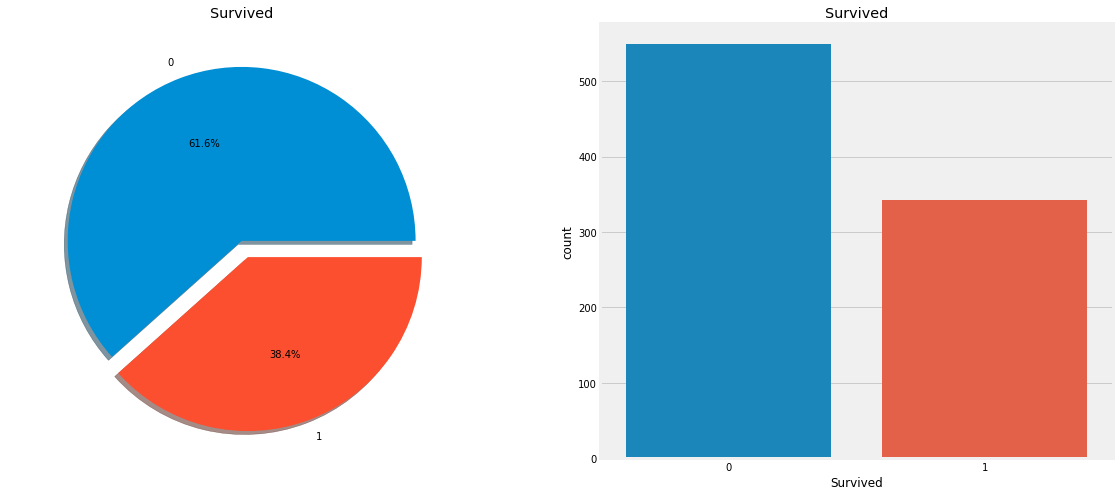

In [5]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')
sns.countplot('Survived', data = data, ax= ax[1])
ax[1].set_title('Survived')
plt.show()

- 891명중 38.4%만 생존, 각 class별로 생존과 어떤 상관관계가 있는지 파악해야 한다.
- 그러기 위해서 먼저 특성들의 type를 알아야 한다.

## type of Features
- categorical Feature
    - 범주형 자료 : 두 개 이상의 범주가 있는 변수이다. 
    - Sex (male, female), Embarked(S, C, Q) 등이 여기에 속한다. 
- ordinal Feature(순서형 특성)
    - 범주형 자료와 비슷하지만 각각의 값 간의 상대적 순서 지정 또는 정렬이 가능 (ex : 높음, 중간, 짧음)
    - Pclass (1,2,3)등이 여기에 속함
- continous Feature
    - 연속적으로 나오는 데이터, 항상 최소, 최대값의 사이값들을 구할 수 있다 .
    - age가 여기 속한다.

### Sex -> categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

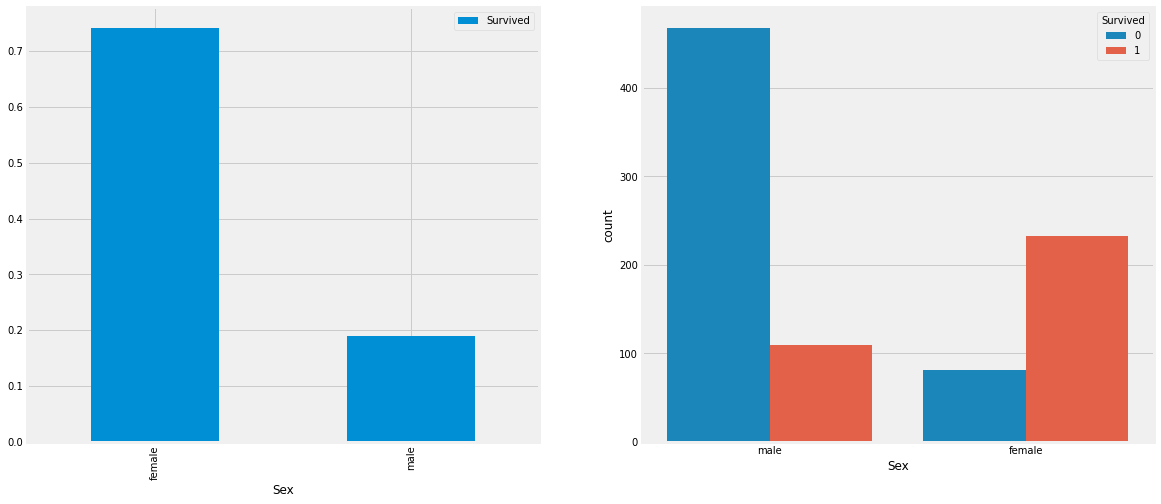

In [7]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
plt.show()

- 남자보다 여자의 생존율이 더 높다.
- 중요한 특성중 하나로 보인다. 
### Pclass -> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins =True).style.background_gradient(cmap = 'cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass', ylabel='count'>

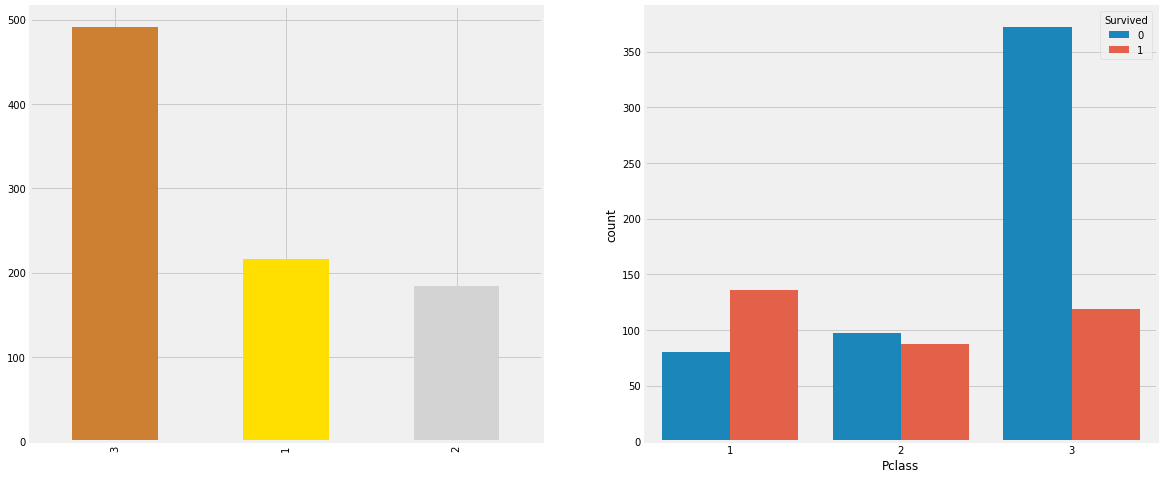

In [9]:
f, ax = plt.subplots(1,2,figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
sns.countplot('Pclass', hue = 'Survived', data = data)

- Pclass가 1인 사람, 즉 부자들이 더 많이 살았다. 
- sex와 Pclass를 같이 비교

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap='cool')

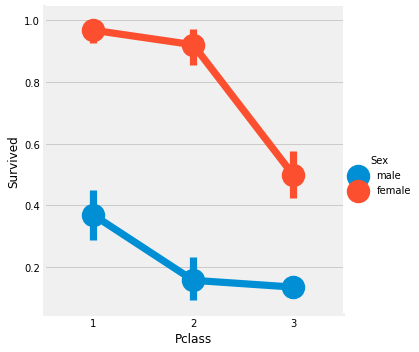

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

- 범주형 데이터를 쉽게 분리가능하기 때문에 factorplot를 사용
- 1등석인데도 남자는 생존률이 낮은걸 확인
### age -> Continous Feature

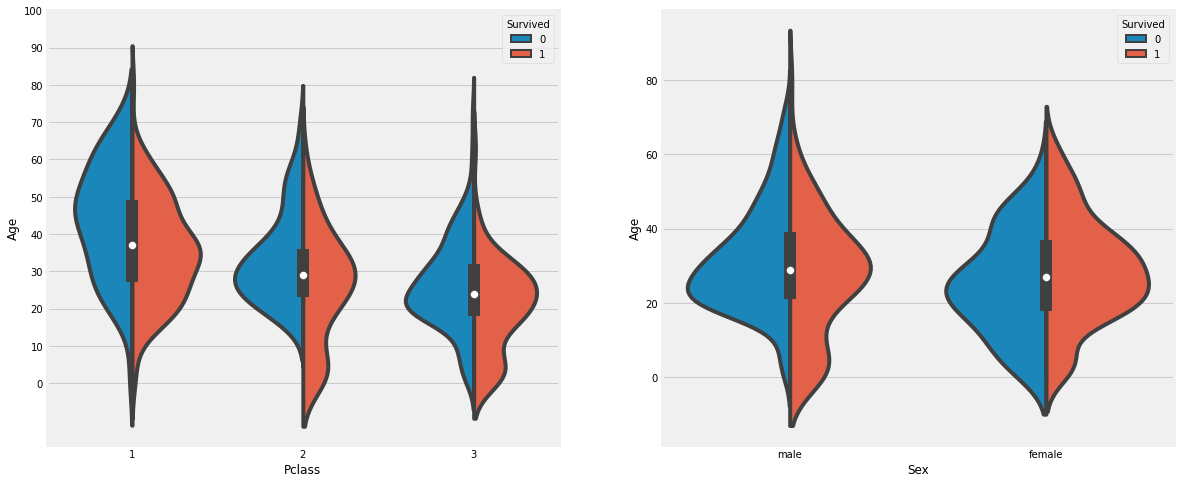

In [12]:
f, ax = plt.subplots(1,2,figsize = (18, 8))
sns.violinplot('Pclass','Age', hue = 'Survived', data= data, split = True, ax = ax[0])
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data= data, split = True, ax = ax[1])
plt.show()

- age에는 177개의 null데이터가 존재함, 이 값들을 채우기 위해선 평균값을 사용할 수도 있지만 차이가 너무 난다. 4살을 29살로 지정할 수도 있다.
- 해결방법으로 이름을 보고 나이의 평균값을 각각의 그룹으로 지정할 수 있다. 
- !! 중요 !! 미국은 Mr,Mrs, Dr, Major 등 나이를 특정할 수 있는 부분이 있다. 

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # 정규식 사용, dot(.)뒤에 문자열 찾기

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'cool')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 철자가 틀린 Mile, Mme들이 있어 범주화 시킨다.

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- 이제 null data를 채우면 된다. 

In [17]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [18]:
data.Age.isnull().any() # 

False

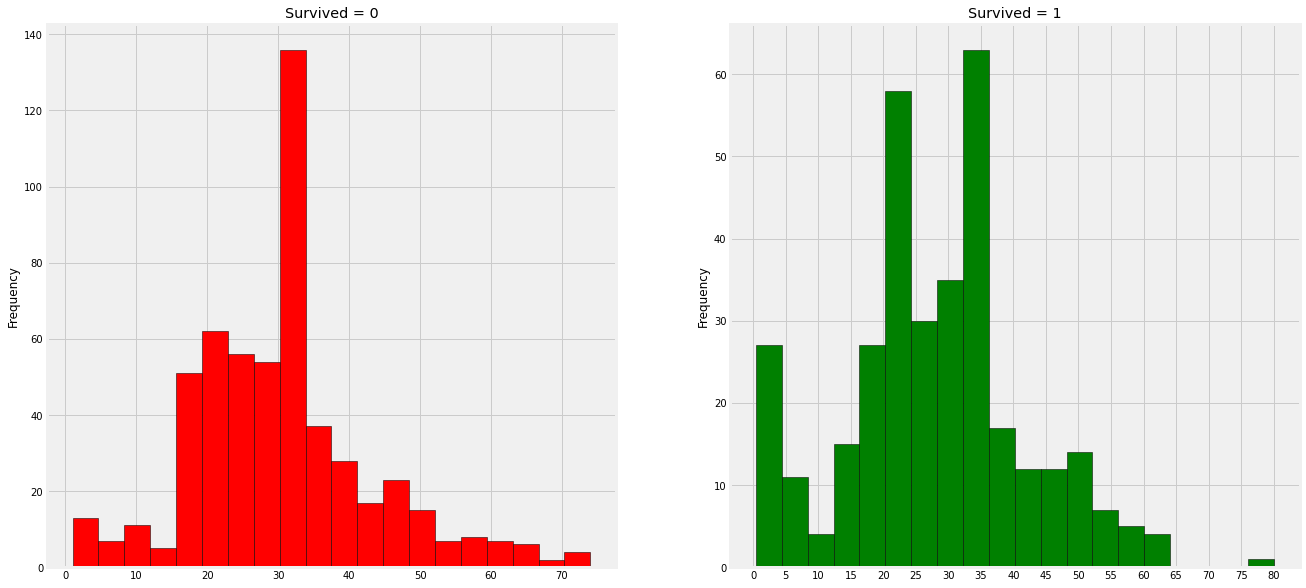

In [19]:
f,ax = plt.subplots(1,2,figsize = (20,10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor = 'black', color = 'red')  # bin : 막대의 개수 조절
ax[0].set_title('Survived = 0')
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green',edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0,85,5))
plt.show()

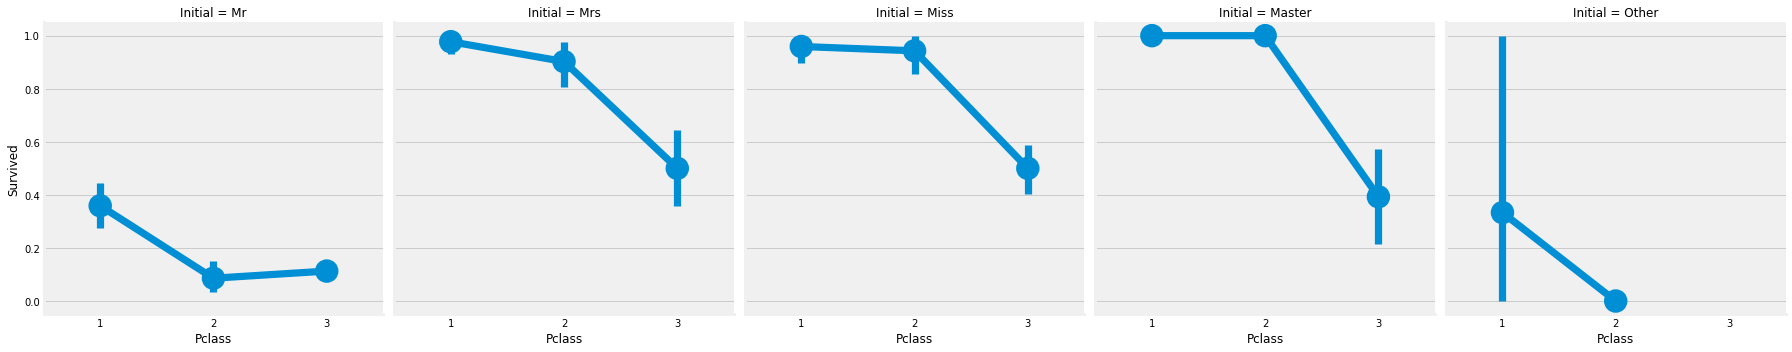

In [20]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data =data)
plt.show()

- 여성과 아동들이 많이 살았음,
### Embarked -> Categorical Value

In [21]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap='summer_r')

- 항구마다 생존 가능성

- gcf는 get current figure의 약어로,figure를 확인하기 위한 방법으로는 plt.gcf()를 사용한다.

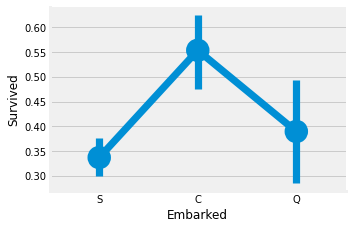

In [22]:
sns.factorplot('Embarked','Survived',data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- 위 그림은 생존확률을 표현, C가 가장 높고 S가 가장 낮다

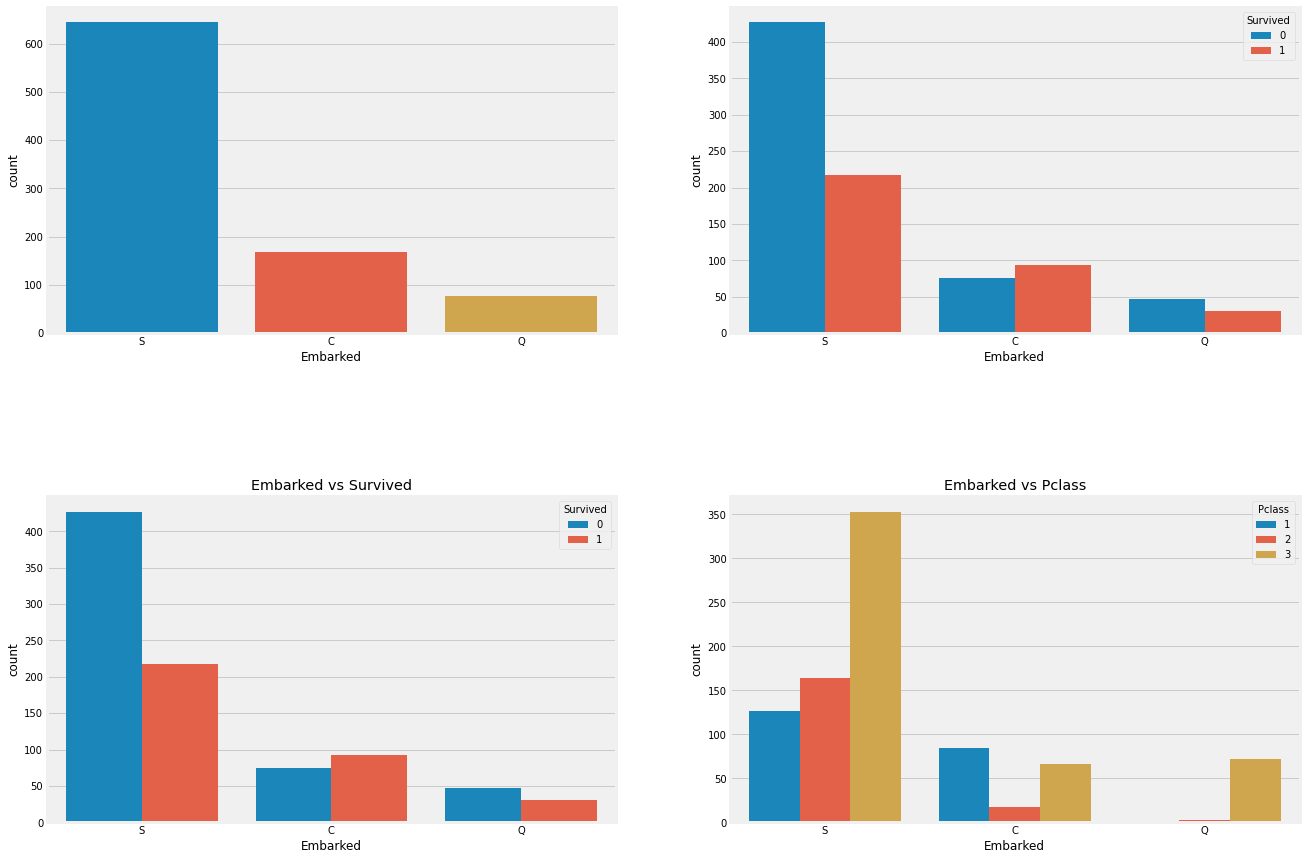

In [23]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
sns.countplot('Embarked', hue = 'Survived', data=data, ax=ax[0,1])
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- S항구에서 가장 많이 탑승했고, 그중 대부분이 Pclass 3이다
- C항구에서 탑승한 승객의 생존율이 가장 좋다
- S항구에서 부자들이 많이 탑승했지만 생존율이 낮은 이유는 Pclass3의 비율이 많기 때문이다.

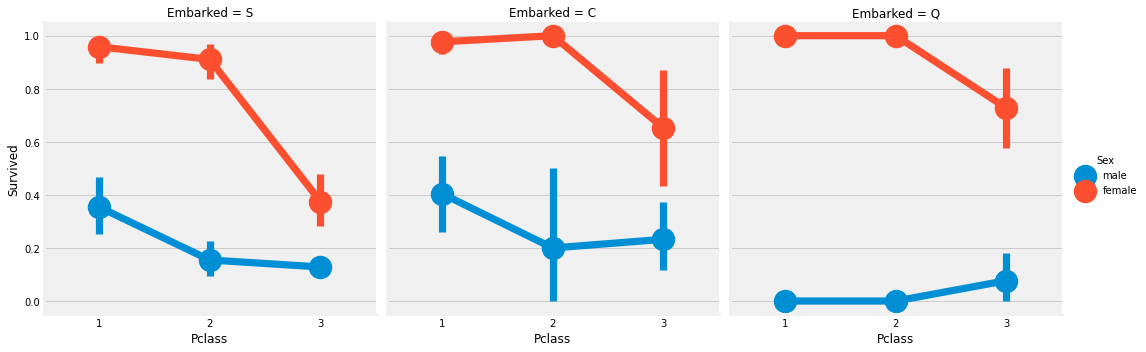

In [24]:
sns.factorplot('Pclass', 'Survived',hue = 'Sex', col = 'Embarked', data =data)
plt.show()

### null data를 채우기
- S항구에서 탄 사람들이 가장 많으니 Embarked 의 null데이터는 S로 채우기

In [25]:
data['Embarked'].fillna('S', inplace = True)
# inplace = True :  원본 df를 보존하지 않고 바로 변경된 데이터를 채워 넣는다

In [26]:
data.Embarked.isnull().any()

False

### SibSip -> discrete Feature(이산 데이터) == categorical data
- 가족을 나타내는 특성

In [27]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap = 'summer_r')
#  SibSp가 0명이라는 뜻은 혼자 옴

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


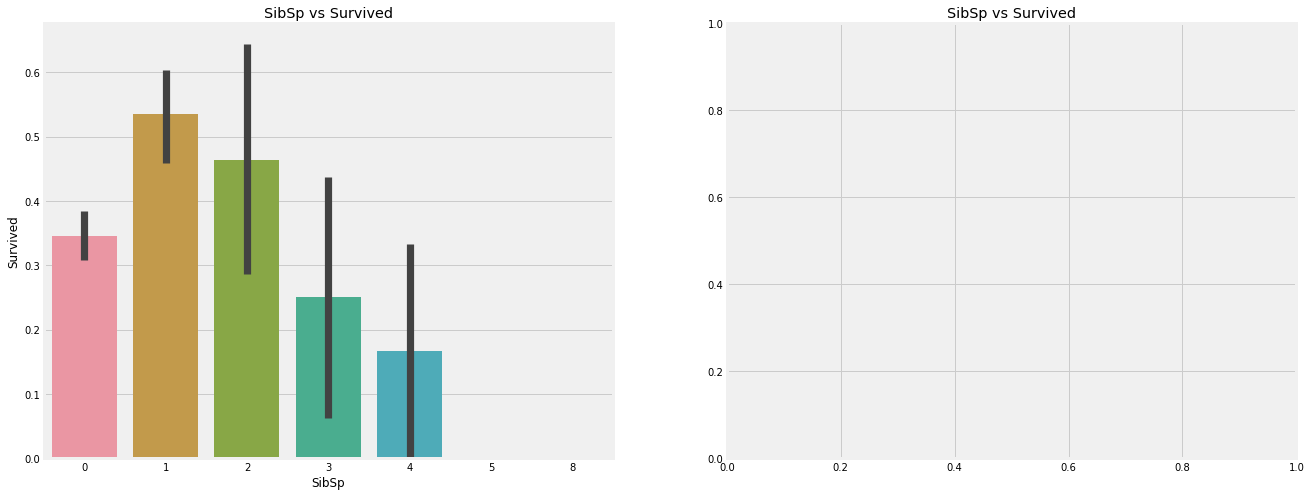

In [28]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1]) # 원래 plt로 표현 안되는거 아닌가..?
ax[1].set_title('SibSp vs Survived')
plt.close(2) # 그림을 지우는 함수
plt.show()
# 그림대로 안 나옴

In [29]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- Fare -> continous Feature

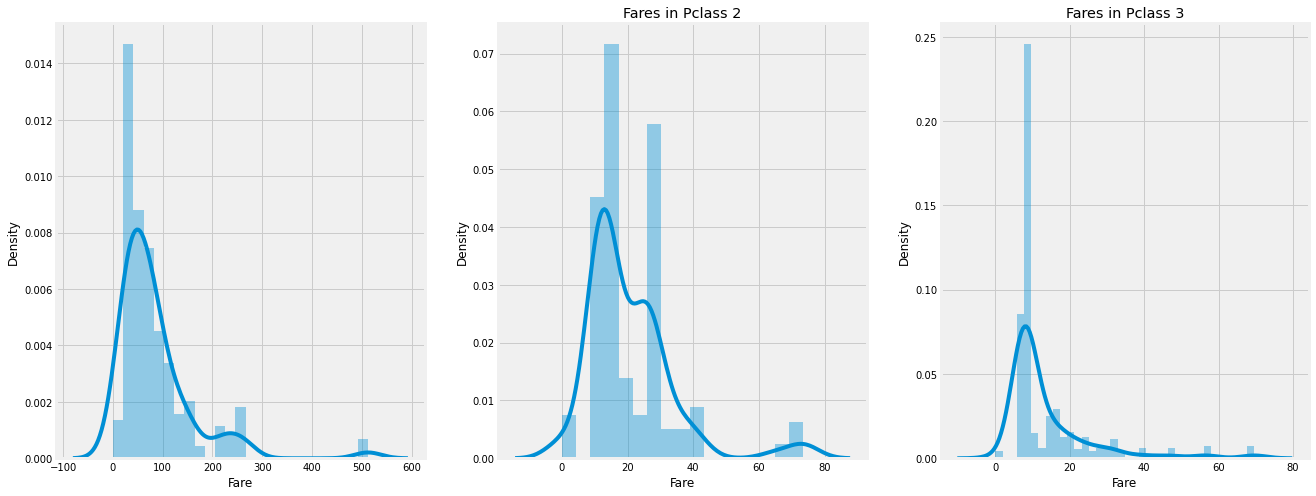

In [30]:
f, ax = plt.subplots(1,3,figsize = (20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- Sex : 여성의 경우 생존확률 높음
- Pclass : 1등석이 생존확률 높음
- Age : 5-10살들은 많이 살고 15-35 살들은 많이 죽음
- Embarked : Pclass1 승객들이 대부분 S에서 탑승했지만 C항구가 더 생존 가능성이 높음
- Parch+SibSp : 혼자 여행보다 1-2명의 자녀, 1-3명의 부모들과 같이 여행하는 것이 생존가능성 높음

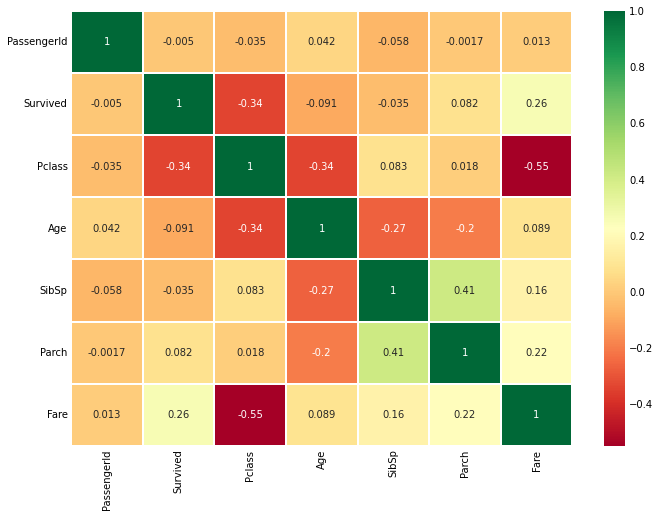

In [31]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2) 
# annot = True : 칸 안에 숫자 표현
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- heatmap의 특징
    - 알파벳이나 문자열의 상관관계는 불분명하기 때문에 숫자적인 특성들만 비교하는 것


## Feature Engineering
### Age Band

- Age는 연속적인 데이터여서 머신러닝 모델이 학습할 때 문제가 생긴다 
    - Eg : 만약 스포츠선수들을 성별에 따라 나누라고 하면 남자, 여자로 나누면 된다.
    - 하지만 나이에 따라 나누라고 하면 기준이 불분명해진다. 
- 그래서 continous data를 정규화나 Binning(구간화)를 통해 categorical data로 바꿔야 한다 
- 나이가 0~80세 까지 있으니 16을 기준으로 구간화를 한다

In [32]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [33]:
data.Age_band.value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


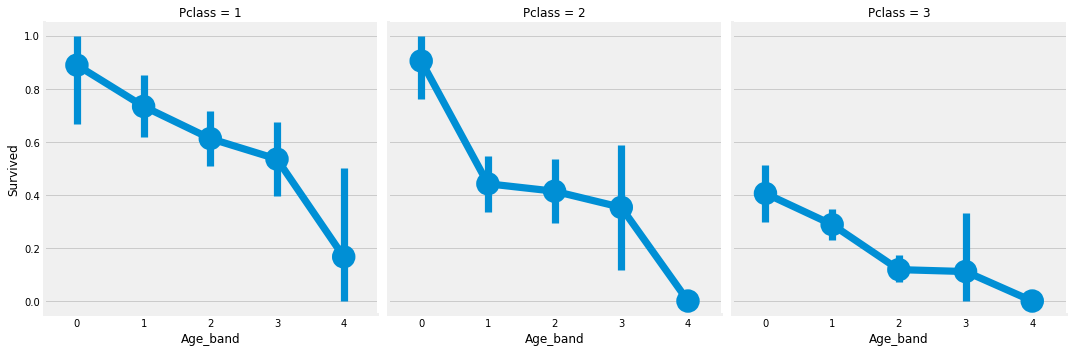

In [34]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')

- Pclass와 관계없이 나이가 증가하면 생존률은 감소함
### Family_Size and Alone
- SibSp와 Parch의 데이터를 합쳐서 하나의 데이터로 표현, 생존률이 가족크기와 관련이 있는지 확인

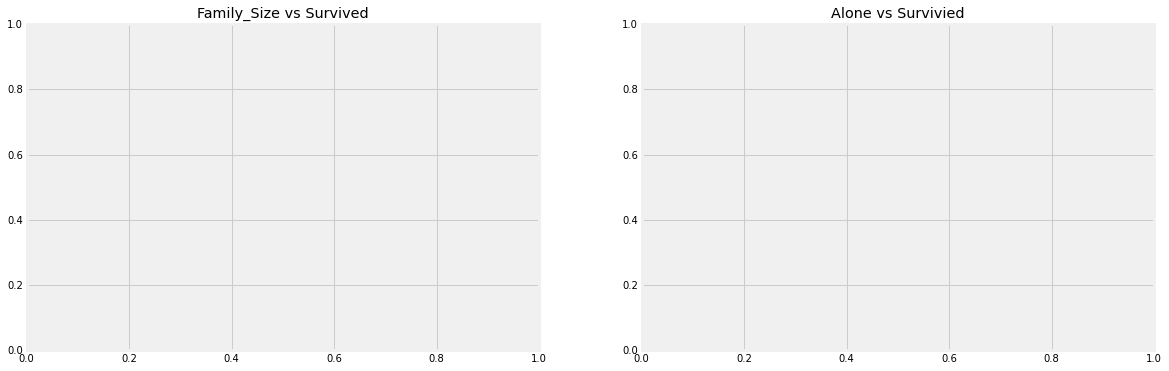

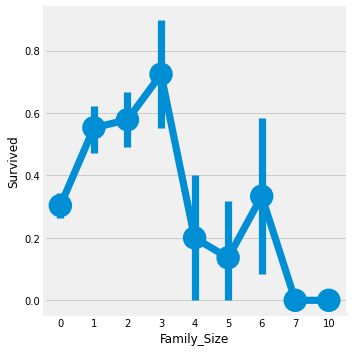

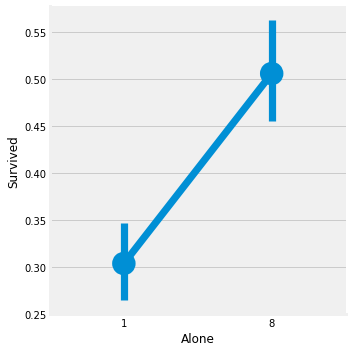

In [35]:
data['Family_Size']=0
data['Family_Size']= data['Parch'] + data['SibSp']
data['Alone'] = 8
data.loc[data.Family_Size == 0 ,'Alone']=1

f, ax = plt.subplots(1,2,figsize = (18,6))
sns.factorplot('Family_Size', 'Survived',data = data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survivied')
#plt.close(2)
#plt.close(3)
plt.show()
# 왜 pyplot그림 위에 올라가지 않는거지?

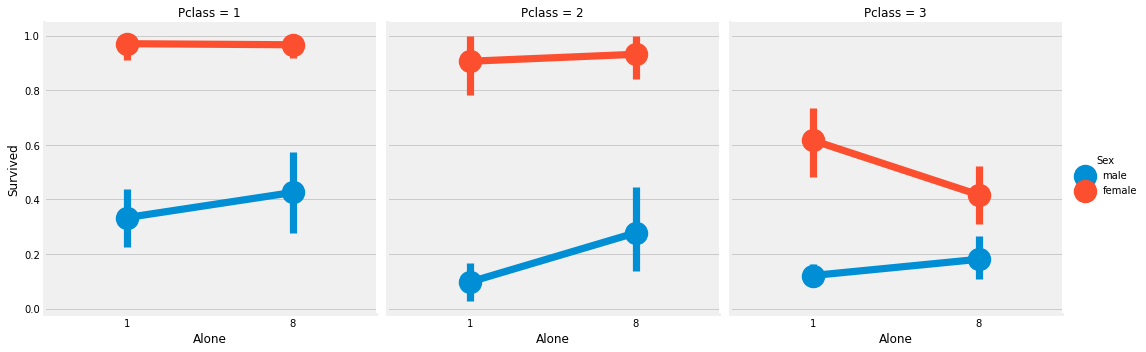

In [36]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

### Fare_Range
- fare도 age처럼 continous데이터이므로 ordinal data로 바꿔주어야 함
- qcut : 샘플들을 분위수(4분위, 2분위)로 나눔
- cut은 데이터를 동일한 길이로 나누는 것이고 qcut은 동일한 갯수로 나누는 것이다.

In [37]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [38]:
data['Fare_Range_cut'] = pd.cut(data['Fare'],4)
data.groupby(['Fare_Range_cut'])['Survived'].mean().to_frame()
# cut 예시, 실제 cut메서드를 사용하면 불균형이 옴

,Survived
Fare_Range_cut,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


- fare_range가 높을수록 생존가능성도 높아진다

In [39]:
data['Fare_cut'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cut']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cut']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cut']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cut']=3

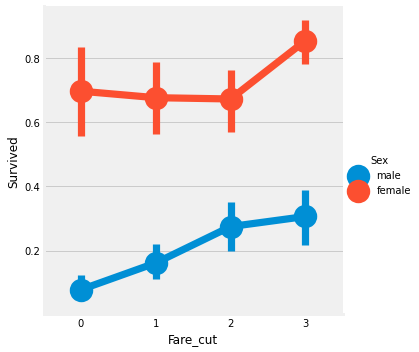

In [40]:
sns.factorplot('Fare_cut', 'Survived', data = data, hue = 'Sex')
plt.show()

### Converting String Values into Numeric
- 이제 Sex의 male, female같은 결과를 숫자로 바꿔야한다

In [41]:
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace = True)

### 필요없는 데이터 삭제
- name -> 범주형데이터로 바뀌지 않으므로 삭제
- age -> age_band열이 있으므로 age열은 필요없음
- Ticket -> 랜덤한 문자열이므로 범주화가 안된다
- fare -> 이미 Fare_cut의 열을 만들어서 fare열은 필요없음
- cabin -> null data도 많고 손님당 여러 객실을 가지고 있어서 못사용
- fare_range -> 이미 fare_cut를 가지고 있음
- Passengerld -> 분류불가능

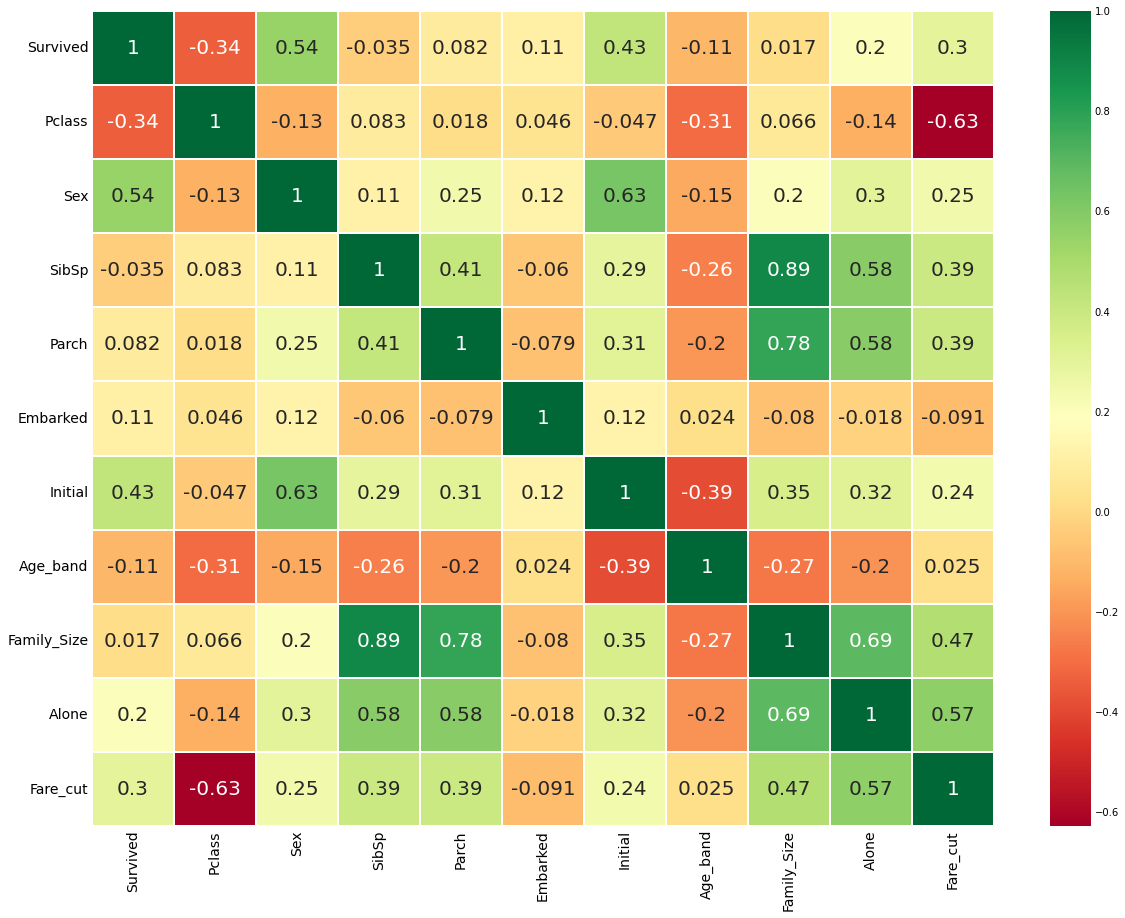

In [42]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin','Fare_Range', 'PassengerId'], axis = 1, inplace = True)
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- SibSp andd Family_Size and Parch and Family_Sized은 긍정적 반응
- Alone and Family_Size.은 부정적 반응들을 보여줌
### Predictive Modeling